In [25]:
# !pip install tensorflow

import tensorflow as tf

In [27]:
mnist  = tf.keras.datasets.mnist # mnist is the dataset which contains handwritten digits

After loading the MNIST data, Divide into train and test datasets. 
MNIST constains training samples = 60,000 , Testing samples = 10,000


In [32]:
#unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train = data and y_train = lable

In [34]:
x_train.shape

(60000, 28, 28)

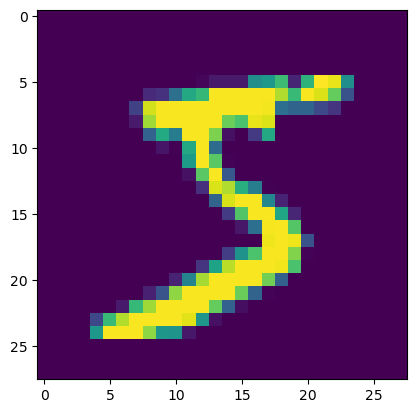

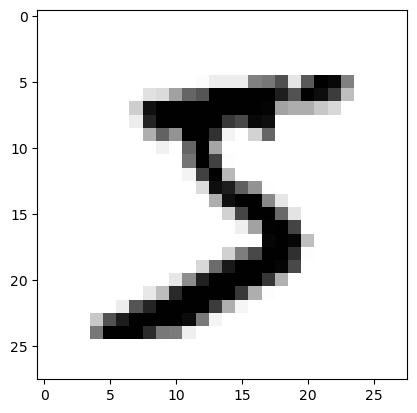

In [36]:
# checking the graph , how data look like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() 
# however we dont know whether its color image or binary image
# so we converted it into binary image
plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.cm.binary converts the pixel from balck to white and white to black but we not need it

In [38]:
print(x_train[0]) # 255 is white and 0 is black

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

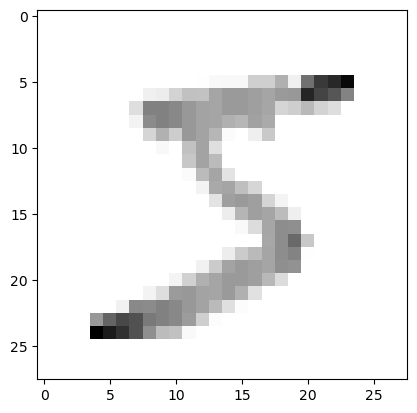

In [40]:
# digits varry from 0 to 255 so we have to normalize it
# all values divided by 255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [42]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [51]:
print(y_train[0])

5


Resizing image to make it suitable to apply Convolution operation

In [46]:
import numpy as np
IMG_SIZE=28
# -1 corresponds to 60,000
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE , 1)  # incresing one dimension for kernel operatin
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # incresing one dimension for kernel operation 
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
#### Training on 60,000 samples of MNIST handwritten dataset

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [56]:
# Creating  a neural network
model = Sequential()

#Convolution layers help in feature detection.
#First Convolution Layer   26*26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ## only for first convolution layer to mention input layer size
model.add(Activation("relu")) # activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) # maxpooling single maximum value of 2x2

#Non-linearity (ReLU) enables the model to learn more complex patterns.
#Spatial dimensions represent the height and width of feature maps and often reduce as layers progress.
#Second Convolution Layer  13*13
model.add(Conv2D(64, (3,3))) ##
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Third Convolution Layer  24-3+1 = 22 * 22
model.add(Conv2D(64, (3,3))) ##
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully Connected layer 1 20x20 = 400
model.add(Flatten()) # before using fully connected layer, convert 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

## Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

## Last Fully Connected layer , output must be equal to number of classes
#Softmax transforms outputs into probabilities, helping with classification.
model.add(Dense(10))
model.add(Activation("softmax"))



C:\Users\ujjwa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#Adam (Adaptive Moment Estimation) is an optimization algorithm that adjusts the learning rate for each parameter during training.
#How to measure model performance (using a loss function),
#How to update the model weights (using an optimizer), and
#What additional metrics to observe during training (in this case, accuracy).

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [64]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7812 - loss: 0.6737 - val_accuracy: 0.9566 - val_loss: 0.1389
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9679 - loss: 0.1106 - val_accuracy: 0.9675 - val_loss: 0.1017
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9772 - loss: 0.0720 - val_accuracy: 0.9649 - val_loss: 0.1152
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9800 - loss: 0.0595 - val_accuracy: 0.9772 - val_loss: 0.0761
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9739 - val_loss: 0.0873


In [66]:
# Evaluating on testing data set MNIST
test_loss , test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy in 10,000 test samples", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9720 - loss: 0.0965
Test loss on 10,000 test samples 0.08124332129955292
Validation Accuracy in 10,000 test samples 0.9768999814987183


In [68]:
prediction = model.predict([x_testr])

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:02 199ms/step

C:\Users\ujjwa\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [70]:
print(prediction) # actually these predictions are based on one hot encoding so there are only arrays, containing softmax probability

[[4.4178611e-07 3.1010376e-07 3.8075737e-05 ... 9.9988806e-01
  5.6054239e-07 7.4612226e-06]
 [2.1322970e-05 1.4620568e-07 9.9994874e-01 ... 1.2845294e-05
  1.1972789e-05 3.2657346e-07]
 [3.5066305e-06 9.9996281e-01 4.8659081e-06 ... 5.5310657e-06
  2.6888192e-06 1.8664950e-08]
 ...
 [1.0494469e-08 2.9281355e-07 3.8649213e-09 ... 3.5592304e-08
  5.0592612e-06 4.0839382e-07]
 [4.6242978e-05 7.7995814e-08 4.5114043e-06 ... 3.7122632e-07
  3.3400794e-03 1.4371232e-05]
 [1.4682141e-03 3.6502340e-07 3.9831637e-05 ... 2.1760870e-08
  6.3439352e-06 6.3851971e-06]]


In [72]:
print(np.argmax(prediction[0]))

7


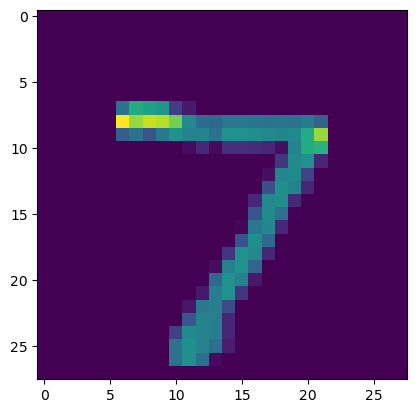

In [74]:
plt.imshow(x_test[0])

In [76]:
# for checking image from our computer
import cv2

In [78]:
img = cv2.imread("four.png")

In [80]:
img.shape

(1660, 1700, 3)

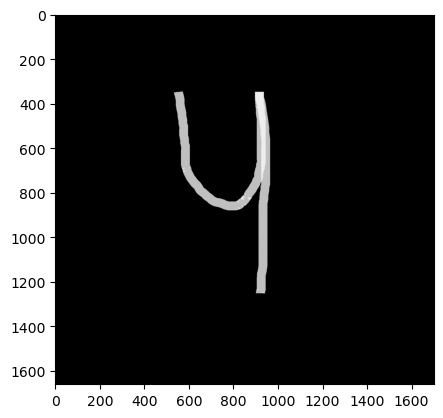

In [82]:
plt.imshow(img)

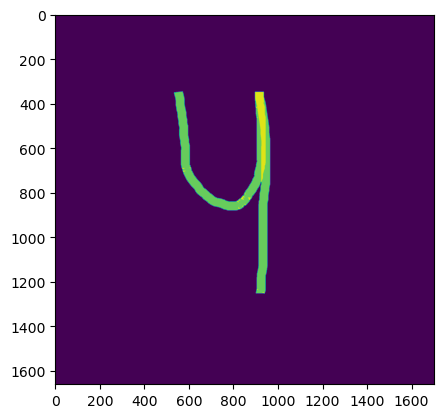

In [84]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [86]:
gray.shape

(1660, 1700)

In [88]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [90]:
resized.shape

(28, 28)

In [92]:
newing = tf.keras.utils.normalize(resized, axis = 1) ## 0 to 1 scaling

In [94]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [96]:
newing.shape

(1, 28, 28, 1)

In [98]:
prediction =  model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [100]:
print(np.argmax(prediction))

4


In [ ]:
# For video
import numpy as np
import cv2
cap = cv2.VideoCapture("Video2.mp4")
font = cv2.FONT_HERSHEY_PLAIN
(text_width, text_height) = cv2.getTextSize("Some text in a box!", font, fontScale = 1.5, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2 , text_offset_y - text_height - 2))

cntr=0
while True:
    ret, frame = cap.read()
    cntr = cntr+1
    
    if ret == False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newing = tf.keras.utils.normalize(resized, axis=1)
    newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(newing)
    status = np.argmax(prediction)

    print(status)
    print(type(status))

    x1, y1,w1,h1=0,0,175,75
    cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,255,0), -1)
    cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    cv2.imshow("Digit recognization", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

    

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1
<class 'numpy.int64'>
1/1 ━━━━